In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
y = dataset['Exited']

In [5]:
X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] 

In [6]:
X.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10


In [7]:
geo = dataset['Geography']

In [8]:
geo = pd.get_dummies(geo, drop_first=True)

In [9]:
gender = dataset['Gender']

In [10]:
gender = pd.get_dummies(gender, drop_first=True)

In [11]:
active_mem = dataset['IsActiveMember']

In [12]:
active_mem = pd.get_dummies(active_mem, drop_first=True)

In [13]:
credit_card = dataset['HasCrCard']

In [14]:
credit_card = pd.get_dummies(credit_card, drop_first=True)

In [15]:
noofprod = dataset['NumOfProducts']

In [16]:
noofprod = pd.get_dummies(noofprod, drop_first=True)

In [17]:
# now lets add all the variables to X

In [18]:
X = pd.concat([X,geo,gender,active_mem,credit_card,noofprod], axis=1)

In [19]:
X

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Germany,Spain,Male,1,1,2,3,4
0,619,42,2,0.00,101348.88,0,0,0,1,1,0,0,0
1,608,41,1,83807.86,112542.58,0,1,0,1,0,0,0,0
2,502,42,8,159660.80,113931.57,0,0,0,0,1,0,1,0
3,699,39,1,0.00,93826.63,0,0,0,0,0,1,0,0
4,850,43,2,125510.82,79084.10,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,96270.64,0,0,1,0,1,1,0,0
9996,516,35,10,57369.61,101699.77,0,0,1,1,1,0,0,0
9997,709,36,7,0.00,42085.58,0,0,0,1,0,0,0,0
9998,772,42,3,75075.31,92888.52,1,0,1,0,1,1,0,0


In [20]:
X.isnull() # to check if there is any NaN value

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Germany,Spain,Male,1,1,2,3,4
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
import seaborn as sns
sns.set()

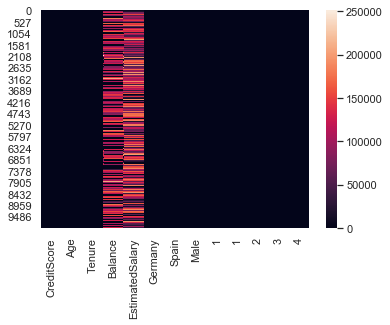

In [22]:
sns.heatmap(X) # this means no null value in X

In [23]:
age = X['Age']

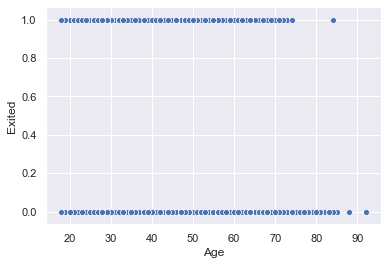

In [24]:
sns.scatterplot(age, y) # binary classification 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
from keras.models import Sequential

Using TensorFlow backend.


In [28]:
model = Sequential()

In [29]:
from keras.layers import Dense

In [30]:
model.add(Dense(units=7, input_dim=13, activation='relu'))

In [31]:
model.add(Dense(units=6, activation='relu'))

In [32]:
model.add(Dense(units=6, activation='relu'))

In [33]:
model.add(Dense(units=1, activation='sigmoid'))

In [34]:
from keras.optimizers import Adam

In [35]:
model.compile(optimizer=Adam(learning_rate=0.000001), loss='binary_crossentropy')

In [36]:
model.fit(X_train, y_train, epochs=200, verbose=0 )

In [37]:
type(model.history.history)

dict

In [38]:
df_loss = pd.DataFrame(model.history.history)

In [39]:
type(df_loss)

pandas.core.frame.DataFrame

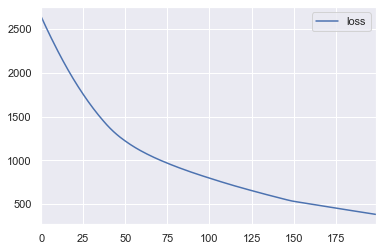

In [40]:
df_loss.plot()

In [41]:
model.history.history

{'loss': [2640.24445703125,
  2598.220650390625,
  2556.796139160156,
  2515.861102783203,
  2475.3338642578124,
  2435.4415717773436,
  2396.193560058594,
  2357.4549262695314,
  2319.1598623046875,
  2281.2635263671873,
  2243.7940861816405,
  2206.9208115234374,
  2170.799198974609,
  2135.2410778808594,
  2100.13286328125,
  2065.6752431640625,
  2031.6348193359374,
  1998.1904736328124,
  1965.4862678222655,
  1933.3400834960937,
  1901.918140625,
  1870.973439453125,
  1840.595836669922,
  1810.9376401367188,
  1781.692724609375,
  1752.8968898925782,
  1724.6434216308594,
  1697.0009553222656,
  1669.874232421875,
  1643.2603146972656,
  1617.0958435058594,
  1591.41962109375,
  1566.3404870605468,
  1541.8770153808593,
  1517.9547443847657,
  1494.5340673828125,
  1471.6400187988281,
  1449.2107216796876,
  1427.050766845703,
  1405.5558435058595,
  1385.0218715820313,
  1365.3344172363281,
  1346.4571166992187,
  1328.2847573242188,
  1310.9816806640624,
  1294.258361694336,
 